## §0. Import Data

In [6]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

Let's take a look at the first few rows of our data. 

In [3]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## §1. Exploring Data

In [7]:
# shortern the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


To learn more about the relationships between penguin species and different features, we will write a function to see the different median values of different features among different species.

In [10]:
def penguin_summary_table(group_cols, value_cols):
    return penguins.groupby(group_cols)[value_cols].median().round(2)

In [9]:
penguin_summary_table(["Species", "Sex", "Island"], 
                      ["Culmen Length (mm)", "Body Mass (g)", 
                       "Culmen Depth (mm)", "Flipper Length (mm)"])

Culmen Length (mm)  Body Mass (g)  \
Species   Sex    Island                                         
Adelie    FEMALE Biscoe                  37.75         3375.0   
                 Dream                   36.80         3400.0   
                 Torgersen               37.60         3400.0   
          MALE   Biscoe                  40.80         4000.0   
                 Dream                   40.25         3987.5   
                 Torgersen               41.10         4000.0   
Chinstrap FEMALE Dream                   46.30         3550.0   
          MALE   Dream                   50.95         3950.0   
Gentoo    .      Biscoe                  44.50         4875.0   
          FEMALE Biscoe                  45.50         4700.0   
          MALE   Biscoe                  49.50         5500.0   

                            Culmen Depth (mm)  Flipper Length (mm)  
Species   Sex    Island                                             
Adelie    FEMALE Biscoe                 17.70                187.0  
                 Dream                  17.80                188.0  
                 Torgersen              17.45                189.0  
          MALE   Biscoe                 18.90                191.0  
                 Dream                  18.65                190.5  
                 Torgersen              19.20                195.0  
Chinstrap FEMALE Dream                  17.65                192.0  
          MALE   Dream                  19.30                200.5  
Gentoo    .      Biscoe                 15.70                217.0  
          FEMALE Biscoe                 14.25                212.0  
          MALE   Biscoe                 15.70                221.0

As shown in the table, only Adelie penguins live on Torgersen island. On Biscoe island, there are Gentoo and Adelie penguins. On Dream island, there are Chinstrap and Adelie penguins. 

With respect to each species, the values for each feature for male and female don't differ too much.

The culmen length of Adelie is significantly shorter than Chinstrap and Gentoo, and the body mass of Gentoo is significantly larger than Adelie and Chinstrap.

### 1.1 Inspect individual features with respect to species

Now, we can create histograms to visualize how `Culmen Length (mm)`, `Body Mass (g)`, `Culmen Depth (mm)`, and `Flipper Length (mm)` values differ for each species of penguin in our data set.

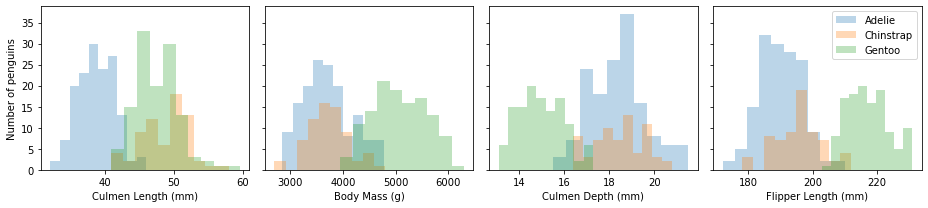

In [11]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,4, figsize = (13,3), sharey = True)
ax[0].set(ylabel = "Number of penguins")
features = ["Culmen Length (mm)", "Body Mass (g)", 
            "Culmen Depth (mm)","Flipper Length (mm)"]

for i in range(0,len(features)):
    for s in penguins["Species"].unique():
        df = penguins[penguins["Species"] == s]
        ax[i].hist(df[features[i]], label = s, alpha = 0.3)
        ax[i].set(xlabel = features[i])
        
plt.tight_layout()
plt.legend()

From the histograms, values of body mass, culmen length, and flipper length for Chinstrap penguins don't differ much from those of Adelie penguins, but the culmen lengths for Chinstrap and Gentoo penguins are significantly different from those of Adelie penguins.

### 1.2 Inspect correlations between features

Now, we want to see if there's some relationship between features. We can do so with the help of scatterplots. 

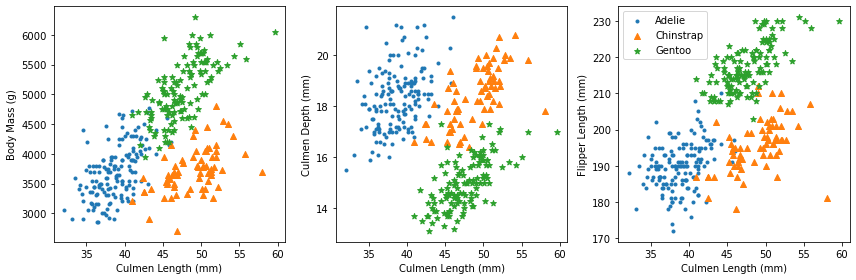

In [40]:
x = "Culmen Length (mm)"
y = ["Body Mass (g)", "Culmen Depth (mm)","Flipper Length (mm)"]
marker = {"Adelie"   : ".",
          "Chinstrap": "^",
          "Gentoo"   : "*"}
fig, ax = plt.subplots(1,3, figsize = (12,4))
for i in range(3):
    for s in penguins["Species"].unique():
        df = penguins[penguins["Species"] == s]
        ax[i].scatter(df[x], df[y[i]], label = s, marker = marker[s])
        ax[i].set(xlabel = x, ylabel = y[i])

plt.tight_layout()
plt.legend()

As we can see from the scatterplots, for Adelie, both body mass and flipper length are positively correlated with culmen length. For Chinstrap and Gentoo, all of body mass, culmen depth, and flipper length are positively correlated with culmen length. 